# Práctica 0 
### Itziar López Almagro y Adrian Carlos Skaczylo 



En esta práctica se realiza, mediante el método de Monte Carlo, el cálculo aproximado de la integral definida de una función positiva en un intervalo $[a,b]$.

El objetivo principal es acotar la gráfica de la función en un rectángulo $[a,b] \times [0,M]$. Para ello dividimos, de manera uniforme, el intervalo $[a,b]$ en subintervalos $[x_i, x_{i+1}]$ donde $a < x_1 < \dots < x_n < b$. Con cada uno de estos $x_i$ calculamos $f(x_i)$ y nos quedamos con el máximo $M$ de todos ellos, es decir, 

$$
M = \max \{ f(x_i) \}.
$$

De esta manera podremos obtener, aproximadamente, el máximo de la función $f$ en $[a,b]$.

Una vez tenemos el rectángulo $[a,b] \times [0,M]$ generamos *num_puntos* puntos aleatorios en dicho rectángulo y con cada uno de ellos comprobamos si cae dentro del área que forma la gráfica con el eje $X$.

Finalmente realizamos el siguiente cálculo:

$$
I \approx (\frac{N_{\text{debajo}}}{N_{\text{total}}} \times (b - a) \times M)
$$



### Implementación
Vamos a hacer dos implementaciones: una utilizando directamente el metodo descrito y otra utilizando vectores y metodos de la biblioteca numpy

In [1]:
!pip install numpy
!pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: C:\Users\Itziar\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: C:\Users\Itziar\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [36]:
import numpy as np
import matplotlib.pyplot as plt #Grafica de funciones
import random
import time
N = 1000


### Método 1

Primero definimos la funcion auxiliar *maximo_relativo* que se encarga de realizar la subdivision $[x_i, x_{i+1}]$ del intervalo $[a, b]$ y devolver el máximo  $M = \max \{ f(x_i) \}$.

In [37]:
def maximo_relativos(a,b,fun):
    subintervalos = np.linspace(a,b,N) #Division del intervalo [a,b]

    valores = [fun(x) for x in subintervalos] #evaluamos f(x_i)
    return max(valores) #Devolvemos el maximo

Procedemos a la implementación del algoritmo:

In [38]:
def integra_mc(fun, a, b, num_puntos =10000):

    M = maximo_relativos(a,b,fun) #Calculamos el maximo
    N_Debajo = 0 #Definimos el contador N_Debajo


    for _ in range(0,num_puntos): 
        
        #Generamos un punto aleatorio (x,y)
        punto = (random.uniform(a,b),random.uniform(0,M))

        if punto[1] <= fun(punto[0]) : #Si y <= f(x) entonces N_Debajo ++
            N_Debajo +=1

    return (N_Debajo/num_puntos)*(b-a)*M

### Método 2

La idea es prescindir del bucle que itera *num_puntos* veces y esto se consigue mediante la funcion *sum* implementada en numpy, la cual permite , dada una lista $ l = [a_1,a_2,...,a_n] $, sumar todos sus elementos , es decir,

$$
sum(l) = \sum_{i=1}^{n} a_i
$$

En nuestro caso, generaremos una lista de booleanos donde  $True =1$ y $False = 0 $


In [39]:
def integra_mc_fast(fun,a,b,num_puntos=10000):
    M = maximo_relativos(a,b,fun) #Calculamos el maximo M

    #Generamos la componente x e y de los puntos aleatorios en distintas listas
    x_vector = np.random.uniform(a,b,num_puntos)
    y_vector = np.random.uniform(0,M,num_puntos)

    f_evaluados = fun(x_vector) #lista con los valores f(x_i)

    N_debajo = np.sum(y_vector <= f_evaluados) #y_vector <= f_evaluados generará una lista de booleanos y con sum realizamos la suma

    return (N_debajo/num_puntos)*(b-a)*M

### Resultado
Vamos a definir un par de funciones en ciertos intervalos y comparar los resultados que dan ambos metodos con el valor real de la integral.

Hemos decidido implementar una funcion que dibuje la grafica de la funcion y otra que compare los tiempos y resultados  de ambos métodos  para hacer el proceso mas visual y ameno .

In [40]:

def medir_tiempos (f,a,b,valor_exacto,nombre_1,nombre_2):
    dots = np.linspace(1000, 1000000, 25) 
    times = []
    times_fast=[]
    
    resultados_1 = []
    resultados_2 = []

    for i in dots:

        tic = time.process_time()
        resultados_1 += [integra_mc(f,a,b,int(i))]
        toc = time.process_time()
        times+= [(toc - tic)]

        tic = time.process_time()
        resultados_2 += [integra_mc_fast(f,a,b,int(i))]
        toc = time.process_time()
        times_fast+= [(toc - tic)] 

    #Dibujamos la grafica de tiempo
    plt.figure()
    plt.scatter(dots, times, c='red', label='método 1')
    plt.scatter(dots, times_fast, c='blue', label='método 2')
    plt.legend()
    plt.xlabel('Numero de puntos')
    plt.ylabel('Tiempo (s)')
    plt.savefig(nombre_1 +'.png')

    #Dibujamos la grafica de resultados
    plt.figure()
    plt.plot(dots, [valor_exacto]*len(dots), c='green',linewidth =3, label='valor exacto') #Grafica constante del valor real
    plt.scatter(dots, resultados_1, c='red', label='método 1') #resultado metodo 1
    plt.scatter(dots, resultados_2, c='blue', label='método 2') #resultados metodo 2
    plt.legend()
    plt.xlabel('Numero de puntos')
    plt.ylabel('Valor Integral')

    plt.savefig(nombre_2+'.png')


In [46]:
a = np.empty(1)
b = np.array([])
b.append(1)
a,b

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [33]:
def graficaFuncion(fun,a,b):
    x = np.linspace(a,b,N)
    y = fun(x)
    plt.plot(x,y)
    plt.title('Grafica de la función')
    # Mostrar el gráfico
    plt.grid(True)
    plt.show()

### Ejemplo 1 

$ f_1(x) = -x^2 + 1, \quad x \in [-1, 1] $

$\int_{-1}^{1} (-x^2 + 1) \, dx =  \frac{4}{3} \approx 1.33333333 $


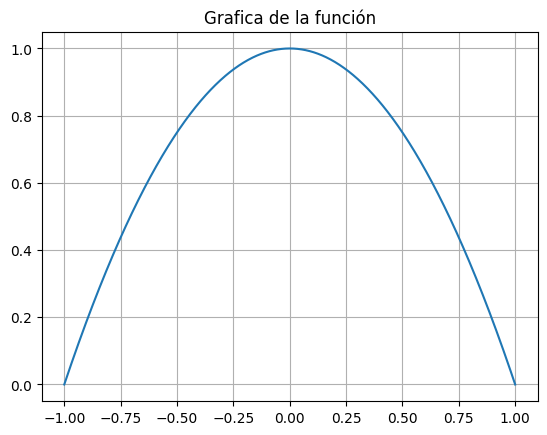

In [34]:
def f1(x):
     return -(x)**2 +1

graficaFuncion(f1,-1,1)


Calculemos cuánto vale la integral de $f_1$ con ambos métodos.

Observamos que el margen de error es muy pequeño. Calculamos los tiempos de ejecución de cada algoritmo y comparamos represetándolos en una gráfica.

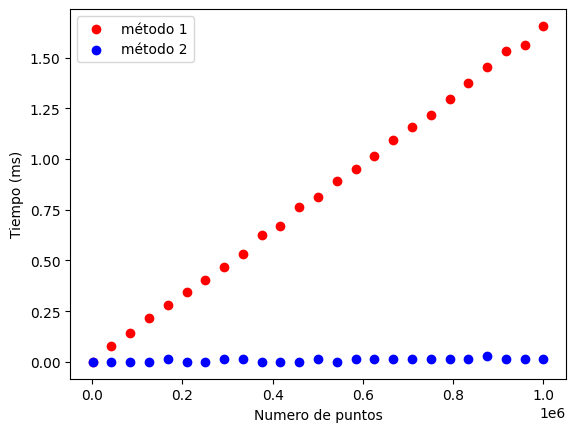

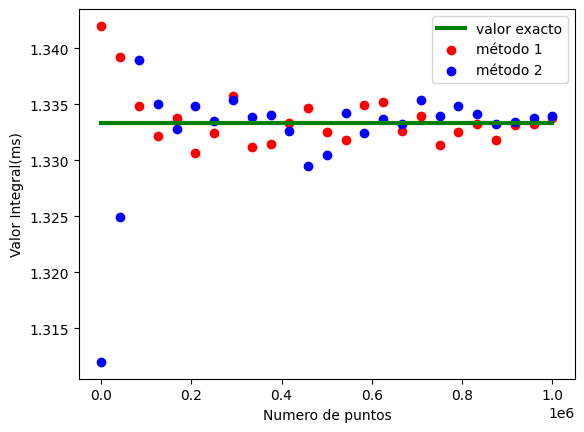

In [35]:
medir_tiempos(f1,-1,1,4/3,'tiempo_ejemplo1','integral_ejemplo1')

Observamos que claramente el segundo método es mucho más rápido en todos los casos de ejecución mientras que el primer método tiene unos mayores tiempos de ejecución conforme el número de puntos generados va aumentando.

### Ejemplo 2

$ f_2(x) = x^3, \quad x \in [0, 10] $

$\int_{0}^{10} x^3 \, dx =  2500$

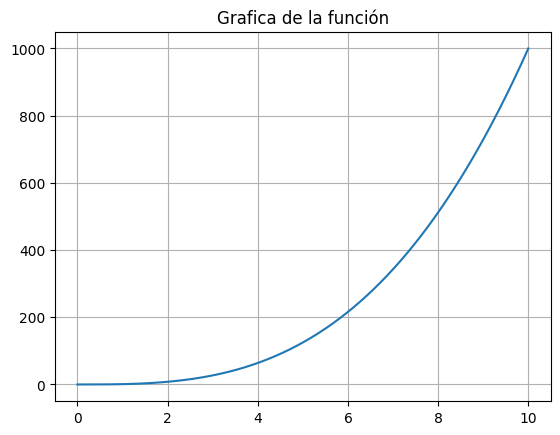

In [31]:
def f2(x):
     return x**3

graficaFuncion(f2,0,10)

Calculamos cuanto vale la integral de $f_2$ entre 0 y 10 ejecutando ambos métodos.

Observamos que cuando aumentamos el número de puntos que se generan la integral tiende a ser más exacta y ambos métodos producen resultados semejantes.

Procedemos a comparar los tiempos de ambos métodos.

[np.float64(2400.0), np.float64(2493.607038123167), np.float64(2499.228486646884), np.float64(2534.1807348560083), np.float64(2493.7313432835817), np.float64(2499.270771069934), np.float64(2507.3978065802594), np.float64(2498.9824711415135), np.float64(2499.1317365269465), np.float64(2505.3178036605655), np.float64(2498.573996405033), np.float64(2495.6905475347316), np.float64(2504.3756243756247), np.float64(2508.7203135808163), np.float64(2491.134903640257), np.float64(2497.541475114931), np.float64(2499.925037481259), np.float64(2500.744399364967), np.float64(2505.164945018327), np.float64(2495.6969218626678), np.float64(2506.130773845231), np.float64(2499.9057277531783), np.float64(2507.9356422143437), np.float64(2497.133168123125), np.float64(2503.96)]


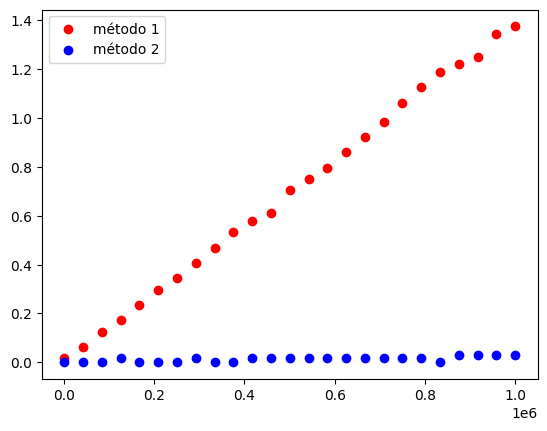

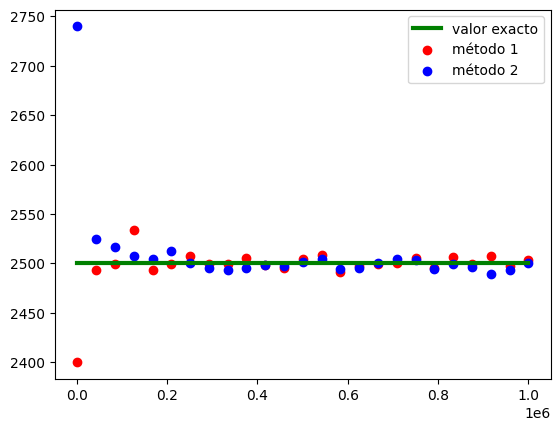

In [29]:
medir_tiempos(f2,0,10,2500,'tiempo_ejemplo2','integral_ejemplo2')

Volvemos a observar que el segundo método es más rápido ya que tarda siempre menos que el primero. Además en el primer método los tiempos varian con tendencia a aumentar según aumenta el número de puntos generados.

## Conclusión
En conclusión, observamos que el método de Monte Carlo hace una muy buena aproximación de la integral. Ambos métodos dan resultados muy parecidos aunque el tiempo de ejecución del primer método es mayor cuando el número de puntos aumenta como hemos comentado anteriormente, por lo que si no se necesita mucha precisión ambos métodos son válidos pues no es necesario generar muchos puntos ; sin embargo, si lo que se busca es precisión es conveniente usar el segundo método para obtener un mejor coste computacional.

esto es una prueba
